In [2]:
from domino.evaluate.evaluate import evaluate_sdms, run_sdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm

In [4]:
from domino.evaluate.evaluate import evaluate_sdms, run_sdm
from domino.vis.evaluate import plot_evaluate_sdms
out = plot_evaluate_sdms([evaluate_sdms.out(4229), evaluate_sdms.out(3812)])

task: plot_evaluate_sdms, run_id=4356
Preparing dataframe...


  6%|▋         | 33/515 [00:01<00:15, 31.37it/s]

0.0
0.1


 11%|█         | 57/515 [00:01<00:14, 31.59it/s]

0.0


 17%|█▋        | 89/515 [00:02<00:13, 31.57it/s]

In [24]:
from scipy.stats import pearsonr
df = evaluate_sdms.out(3812).load()

out = []
for _, row in tqdm(df.iterrows(), total=len(df)):
    dp = run_sdm.out(row.run_id).load()
    inp = run_sdm.inp(row.run_id)
    target, correlate = inp["target"], inp["correlate"]
    out.append(
        {
            "corr": row["corr"],
            "run_id": row.run_id,
            "target": target, 
            "correlate": correlate,
            "new_corr": pearsonr(dp[target], dp[correlate])[0]
        }
    )
plot_df = pd.DataFrame(out)

100%|██████████| 412/412 [00:04<00:00, 85.73it/s]


<AxesSubplot:xlabel='corr', ylabel='new_corr'>

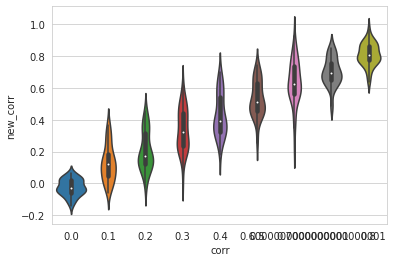

In [29]:
sns.set_style("whitegrid")
sns.violinplot(data=plot_df, x="corr", y="new_corr")